In [1]:
!gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 32.3MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age', ylabel='count'>

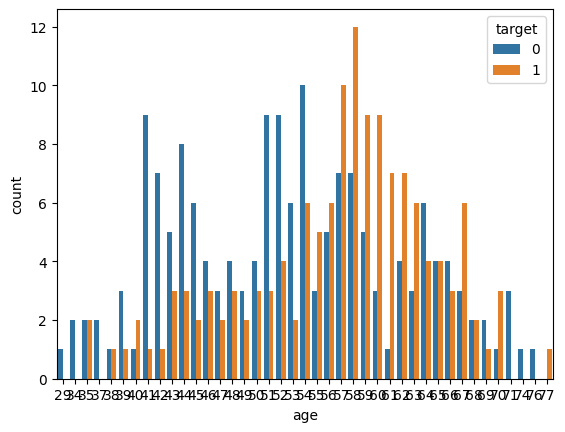

In [19]:
df = pd.read_csv('/content/cleveland.csv', header = None)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','target']
df['target'] = df.target.map(
    {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
)
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

sns.countplot(data=df, x='age', hue='target')

<Axes: xlabel='sex', ylabel='age'>

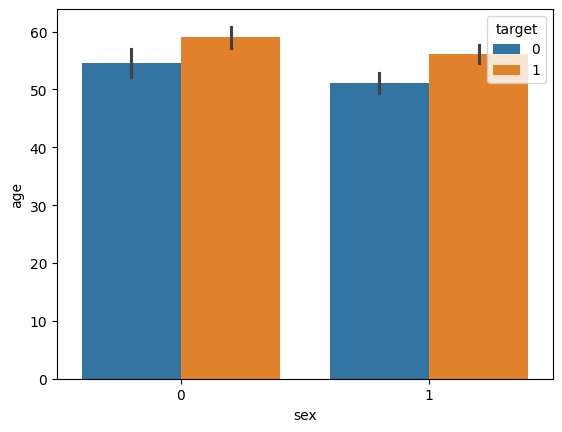

In [22]:
sns.barplot(x='sex', y='age', hue='target', data=df,
            palette=['#1f77b4', '#ff7f0e'])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

cm_train = knn.predict(X_train)
cm_test = knn.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train KNeighborsClassifier: {accuracy_for_train}')
print(f'Accuracy for test KNeighborsClassifier: {accuracy_for_test}')


Accuracy for train KNeighborsClassifier: 0.76
Accuracy for test KNeighborsClassifier: 0.69


In [25]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', random_state=42)
svc.fit(X_train, y_train)

cm_train = svc.predict(X_train)
cm_test = svc.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train SVM: {accuracy_for_train}')
print(f'Accuracy for test SVM: {accuracy_for_test}')


Accuracy for train SVM: 0.66
Accuracy for test SVM: 0.67


In [28]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X_train, y_train)

cm_train = naive.predict(X_train)
cm_test = naive.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train Naive Bayes: {accuracy_for_train}')
print(f'Accuracy for test Naive Bayes: {accuracy_for_test}')


Accuracy for train Naive Bayes: 0.85
Accuracy for test Naive Bayes: 0.84


In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
tree.fit(X_train, y_train)

cm_train = tree.predict(X_train)
cm_test = tree.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train Decision Tree Classifiers: {accuracy_for_train}')
print(f'Accuracy for test Decision Tree Classifiers: {accuracy_for_test}')


Accuracy for train Decision Tree Classifiers: 1.0
Accuracy for test Decision Tree Classifiers: 0.74


In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
forest.fit(X_train, y_train)

cm_train = forest.predict(X_train)
cm_test = forest.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train Random Forest Classifiers: {accuracy_for_train}')
print(f'Accuracy for test Random Forest Classifiers: {accuracy_for_test}')


Accuracy for train Random Forest Classifiers: 0.98
Accuracy for test Random Forest Classifiers: 0.8


In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada.fit(X_train, y_train)

cm_train = ada.predict(X_train)
cm_test = ada.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train Ada Boost Classifier: {accuracy_for_train}')
print(f'Accuracy for test Ada Boost Classifier: {accuracy_for_test}')


Accuracy for train Ada Boost Classifier: 0.91
Accuracy for test Ada Boost Classifier: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
random_state=42)
gbc.fit(X_train, y_train)

cm_train = gbc.predict(X_train)
cm_test = gbc.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train Gradient Boost Classifier: {accuracy_for_train}')
print(f'Accuracy for test Gradient Boost Classifier: {accuracy_for_test}')


Accuracy for train Gradient Boost Classifier: 1.0
Accuracy for test Gradient Boost Classifier: 0.85


In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
xgb.fit(X_train, y_train)

cm_train = xgb.predict(X_train)
cm_test = xgb.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train Gradient Boost Classifier: {accuracy_for_train}')
print(f'Accuracy for test Gradient Boost Classifier: {accuracy_for_test}')


Accuracy for train Gradient Boost Classifier: 1.0
Accuracy for test Gradient Boost Classifier: 0.87


In [38]:
from sklearn.ensemble import StackingClassifier

dtc = DecisionTreeClassifier(random_state =42)
rfc = RandomForestClassifier(random_state =42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

stack = StackingClassifier(
    estimators=[
        ('dtc', dtc),
        ('rfc', rfc),
        ('knn', knn),
        ('xgb', xgb),
        ('gc', gc),
        ('svc', svc),
        ('ad', ad)
    ]
)
stack.fit(X_train, y_train)

cm_train = stack.predict(X_train)
cm_test = stack.predict(X_test)

print()
accuracy_for_train = np.round((np.sum(cm_train == y_train)) / len(y_train), 2)
accuracy_for_test = np.round((np.sum(cm_test == y_test)) / len(y_test), 2)
print(f'Accuracy for train Stacking: {accuracy_for_train}')
print(f'Accuracy for test Stacking: {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Accuracy for train Stacking: 1.0
Accuracy for test Stacking: 0.89
